In [2]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt

import ptitprince as pt

df = pd.read_csv ("/Users/dhewitt/Data/pps/Exports/datalogelec.csv", sep= ",")
df.head()

,ID,Elec_PainL1_1,Elec_UnplsL1_1,Elec_PainR1_1,Elec_UnplsR1_1,Elec_PainL1_2,Elec_UnplsL1_2,Elec_PainR1_2,Elec_UnplsR1_2,Elec_PainL1_3,...,Elec_PainR2_1,Elec_UnplsR2_1,Elec_PainL2_2,Elec_UnplsL2_2,Elec_PainR2_2,Elec_UnplsR2_2,Elec_PainL2_3,Elec_UnplsL2_3,Elec_PainR2_3,Elec_UnplsR2_3
0,2,5,6,4,5,4,6,4,5,5,...,4,5,4,5,3,4,4,5,3,4
1,3,3,4,3,4,4,4,4,4,4,...,2,2,2,2,2,2,2,1,2,2
2,4,6,8,6,8,6,8,4,6,5,...,5,5,4,5,5,5,5,5,4,5
3,5,2,3,2,3,2,1,1,1,3,...,2,2,2,2,2,2,2,2,2,2
4,6,2,3,3,2,2,1,3,3,3,...,3,3,2,2,2,2,2,2,2,2


In [67]:
melted_df = pd.melt(df, id_vars=['ID'], var_name='variable', value_name='NRS')
melted_df[['elec','Vars']] = melted_df['variable'].str.split('Elec_',expand=True)
melted_df[['Vars','Time']] = melted_df['Vars'].str.split('_',expand=True)
melted_df[['measure', 'Block']] = melted_df['Vars'].str.extract(r'(\w+)(\d+)')
melted_df['Side'] = melted_df['measure'].str[-1]
melted_df['Side'] = melted_df['Side'].replace({'L': 'Left', 'R': 'Right'})
melted_df['Measure'] = melted_df['Vars'].str[0]

melted_df.drop(columns=['variable','Vars','measure','elec'], inplace=True)

melted_df

,ID,NRS,Time,Block,Side,Measure
0,2,5,1,1,Left,P
1,3,3,1,1,Left,P
2,4,6,1,1,Left,P
3,5,2,1,1,Left,P
4,6,2,1,1,Left,P
...,...,...,...,...,...,...
619,26,6,3,2,Right,U
620,27,7,3,2,Right,U
621,28,5,3,2,Right,U
622,29,5,3,2,Right,U


In [71]:
grouped_df = melted_df.groupby('Measure')
unpleasantness_df = grouped_df.get_group('U')
pain_intensity_df = grouped_df.get_group('P')

Text(0.5, 1.0, 'Phasic pain intensity ratings')

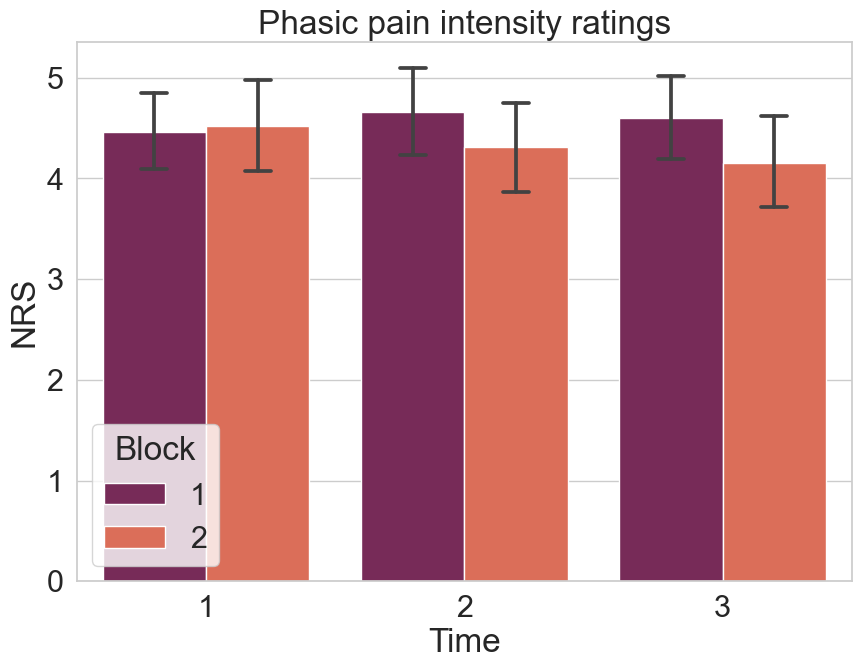

In [82]:
f, ax = plt.subplots(figsize=(10, 7))

sns.barplot(x="Time", y="NRS", data=pain_intensity_df, hue="Block", capsize=0.1, palette="rocket", ax=ax)

plt.title("Phasic pain intensity ratings")


Text(0.5, 1.0, 'Phasic pain unpleasantness ratings')

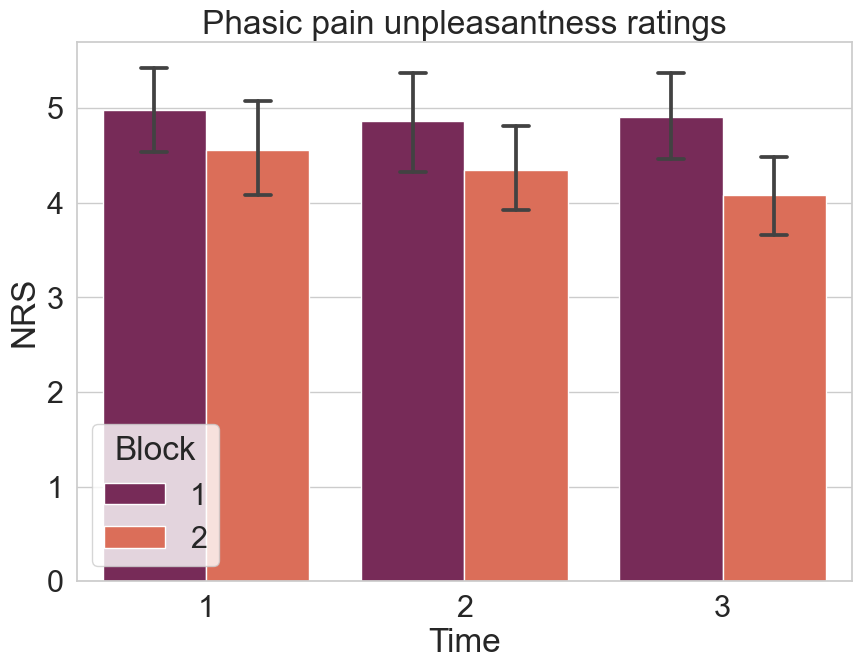

In [83]:
f, ax = plt.subplots(figsize=(10, 7))

sns.barplot(x="Time", y="NRS", data=unpleasantness_df, hue="Block", capsize=0.1, palette="rocket", ax=ax)

plt.title("Phasic pain unpleasantness ratings")

In [135]:
dfext = pd.read_csv ("/Users/dhewitt/Data/pps/Exports/datalogtonic.csv", sep= ",")
dfext.head()

,ID,Cuff L/R,Tonic_Pain1_1,Tonic_Unpls1_1,Tonic_Pain1_2,Tonic_Unpls1_2,Tonic_Pain1_3,Tonic_Unpls1_3,Tonic_Pain1_4,Tonic_Unpls1_4,...,Tonic_Pain2_6,Tonic_Unpls2_6,Tonic_Pain2_7,Tonic_Unpls2_7,Tonic_Pain2_8,Tonic_Unpls2_8,Tonic_Pain2_9,Tonic_Unpls2_9,Tonic_Pain2_10,Tonic_Unpls2_10
0,2,2,3,3,6,7,4,5,3,4,...,4,5,5,6,4,5,3.0,4.0,3,4
1,3,1,3,4,6,7,5,5,4,4,...,2,2,1,2,2,2,2.0,2.0,2,2
2,4,2,4,5,8,9,7,7,5,7,...,4,4,3,3,3,3,2.0,2.0,2,2
3,5,1,3,2,3,2,2,2,1,1,...,2,2,2,2,2,2,2.0,2.0,2,2
4,6,2,3,3,4,4,3,3,3,2,...,2,1,2,2,1,1,1.0,1.0,1,2


In [136]:
dfext['Cuff L/R'] = dfext['Cuff L/R'].astype(str).replace({'1': 'Left', '2': 'Right'})
grouped_df = dfext.groupby('Cuff L/R')
left_df = grouped_df.get_group('Left')
right_df = grouped_df.get_group('Right')

In [137]:
left_df.columns = left_df.columns.str.replace(r'Tonic_Pain1', 'P_Left', regex=True)
left_df.columns = left_df.columns.str.replace(r'Tonic_Unpls1', 'U_Left', regex=True)
left_df.columns = left_df.columns.str.replace(r'Tonic_Pain2', 'P_Right', regex=True)
left_df.columns = left_df.columns.str.replace(r'Tonic_Unpls2', 'U_Right', regex=True)
#left_df.drop(columns=['Cuff L/R'], inplace=True)
right_df.columns = right_df.columns.str.replace(r'Tonic_Pain2', 'P_Left', regex=True)
right_df.columns = right_df.columns.str.replace(r'Tonic_Unpls2', 'U_Left', regex=True)
right_df.columns = right_df.columns.str.replace(r'Tonic_Pain1', 'P_Right', regex=True)
right_df.columns = right_df.columns.str.replace(r'Tonic_Unpls1', 'U_Right', regex=True)
#right_df.drop(columns=['Cuff L/R'], inplace=True)

#cols = right_df.columns.tolist()
#sorted_list = sorted(cols)
#right_df = right_df[sorted_list]
#left_df = left_df[sorted_list]

joineddf = pd.concat([right_df, left_df], axis=0)
joineddf

,ID,Cuff L/R,P_Right_1,U_Right_1,P_Right_2,U_Right_2,P_Right_3,U_Right_3,P_Right_4,U_Right_4,...,P_Left_6,U_Left_6,P_Left_7,U_Left_7,P_Left_8,U_Left_8,P_Left_9,U_Left_9,P_Left_10,U_Left_10
0,2,Right,3,3,6,7,4.0,5.0,3,4,...,4.0,5.0,5,6,4,5,3.0,4.0,3,4
2,4,Right,4,5,8,9,7.0,7.0,5,7,...,4.0,4.0,3,3,3,3,2.0,2.0,2,2
4,6,Right,3,3,4,4,3.0,3.0,3,2,...,2.0,1.0,2,2,1,1,1.0,1.0,1,2
5,8,Right,4,4,5,5,4.0,3.0,4,4,...,3.0,4.0,3,4,4,4,3.0,3.0,3,3
7,10,Right,3,3,7,8,5.0,5.0,7,7,...,5.0,6.0,4,6,4,6,4.0,5.0,4,4
9,12,Right,6,5,6,7,5.0,6.0,4,6,...,3.0,4.0,3,4,3,4,4.0,7.0,2,4
11,14,Right,6,4,5,8,6.0,5.0,5,5,...,3.0,3.0,2,2,2,2,2.0,3.0,2,3
13,16,Right,3,2,6,6,4.0,5.0,4,3,...,5.0,6.0,4,5,3,4,3.0,4.0,2,3
16,20,Right,1,4,3,6,2.0,4.0,2,4,...,2.0,2.0,1,2,1,2,1.0,2.0,1,2
18,22,Right,5,5,7,7,5.0,5.0,5,5,...,5.0,5.0,5,5,5,5,5.0,5.0,5,5


In [138]:
joineddf = joineddf.drop(columns=['Cuff L/R'], axis=1)
melted_df = pd.melt(joineddf, id_vars=['ID'], var_name='variable', value_name='NRS')

In [139]:


melted_df

,ID,variable,NRS
0,2,P_Right_1,3.0
1,4,P_Right_1,4.0
2,6,P_Right_1,3.0
3,8,P_Right_1,4.0
4,10,P_Right_1,3.0
...,...,...,...
1035,19,U_Left_10,4.0
1036,21,U_Left_10,2.0
1037,25,U_Left_10,7.0
1038,27,U_Left_10,5.0


In [140]:
melted_df[['Measure', 'Side', 'Time']] = melted_df['variable'].str.extract(r'([PU])_([RightLeft]+)_(\d+)')
melted_df['Time'] = melted_df['Time'].astype(int) - 1
melted_df.drop(columns=['variable'], axis=1)

,ID,NRS,Measure,Side,Time
0,2,3.0,P,Right,0
1,4,4.0,P,Right,0
2,6,3.0,P,Right,0
3,8,4.0,P,Right,0
4,10,3.0,P,Right,0
...,...,...,...,...,...
1035,19,4.0,U,Left,9
1036,21,2.0,U,Left,9
1037,25,7.0,U,Left,9
1038,27,5.0,U,Left,9


In [141]:
grouped_df = melted_df.groupby('Measure')
unpleasantness_df = grouped_df.get_group('U')
pain_intensity_df = grouped_df.get_group('P')

Text(0.5, 1.0, 'Tonic pain intensity ratings')

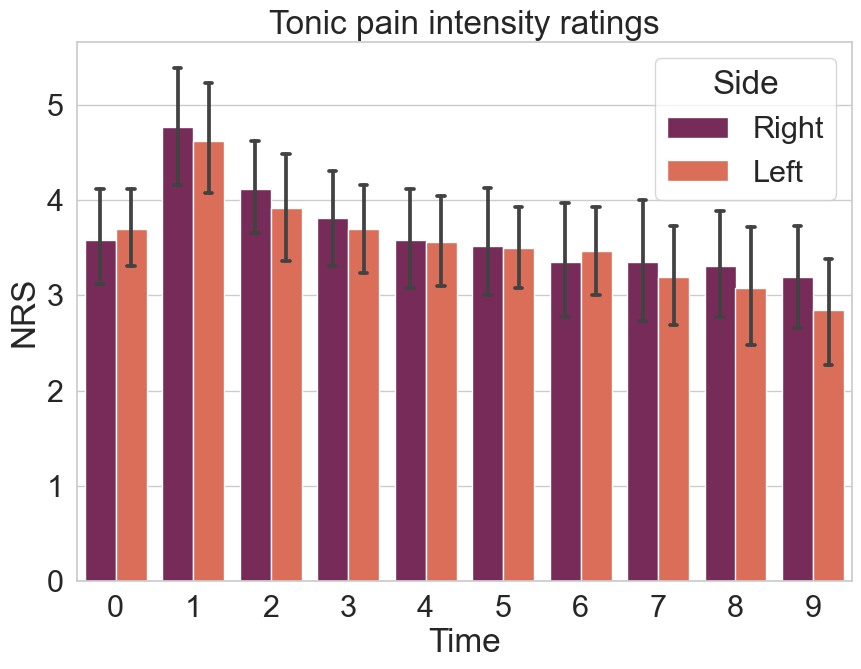

In [142]:
f, ax = plt.subplots(figsize=(10, 7))

sns.barplot(x="Time", y="NRS", data=pain_intensity_df, hue="Side", capsize=0.1, palette="rocket", ax=ax)

plt.title("Tonic pain intensity ratings")


Text(0.5, 1.0, 'Tonic pain unpleasantness ratings')

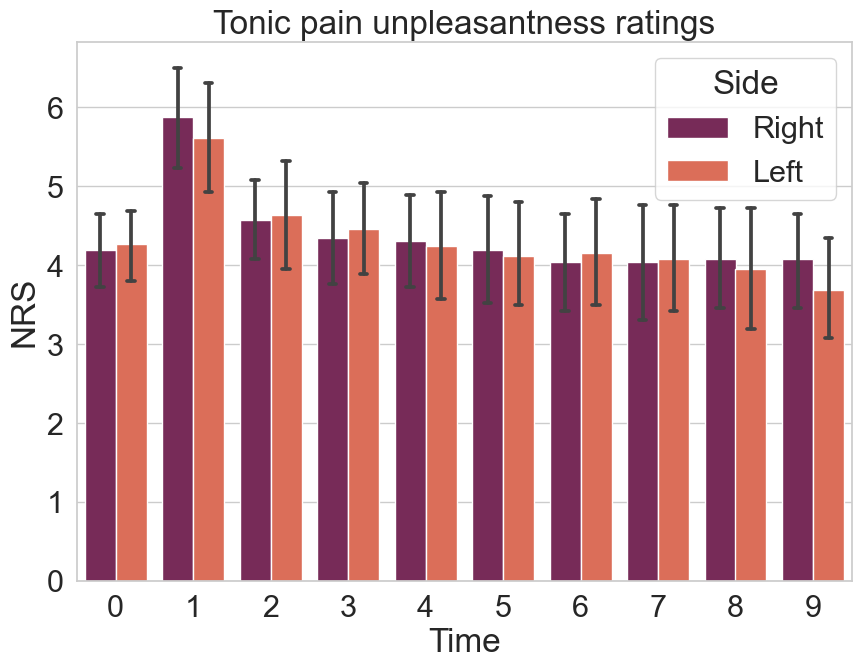

In [143]:
f, ax = plt.subplots(figsize=(10, 7))

sns.barplot(x="Time", y="NRS", data=unpleasantness_df, hue="Side", capsize=0.1, palette="rocket", ax=ax)

plt.title("Tonic pain unpleasantness ratings")